### 데이터 로드 및 결측치 처리

In [142]:
import pandas as pd

train_data = pd.read_csv("data/train.csv", index_col="Id")
dep_var = "SalePrice"
numerical_vars = []
categorical_vars = []
for col in train_data.columns:
    if train_data[col].dtype == "object":
        categorical_vars.append(col)
    else:
        numerical_vars.append(col)
        
print(numerical_vars)
print(categorical_vars)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual

In [143]:
null_true_cols = []
for col in train_data.columns:
    null_cnt = len(train_data[train_data[col].isnull() == True])
    if col in numerical_vars and null_cnt > 0:
        print("결측치 {} : {}".format(col, null_cnt))
        null_true_cols.append(col)
null_true_cols

결측치 LotFrontage : 259
결측치 MasVnrArea : 8
결측치 GarageYrBlt : 81


['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [144]:
for col in null_true_cols:
    this_mean = train_data[col].mean()
    train_data.loc[(train_data[col].isnull()), col] = this_mean

### 이상치 체크

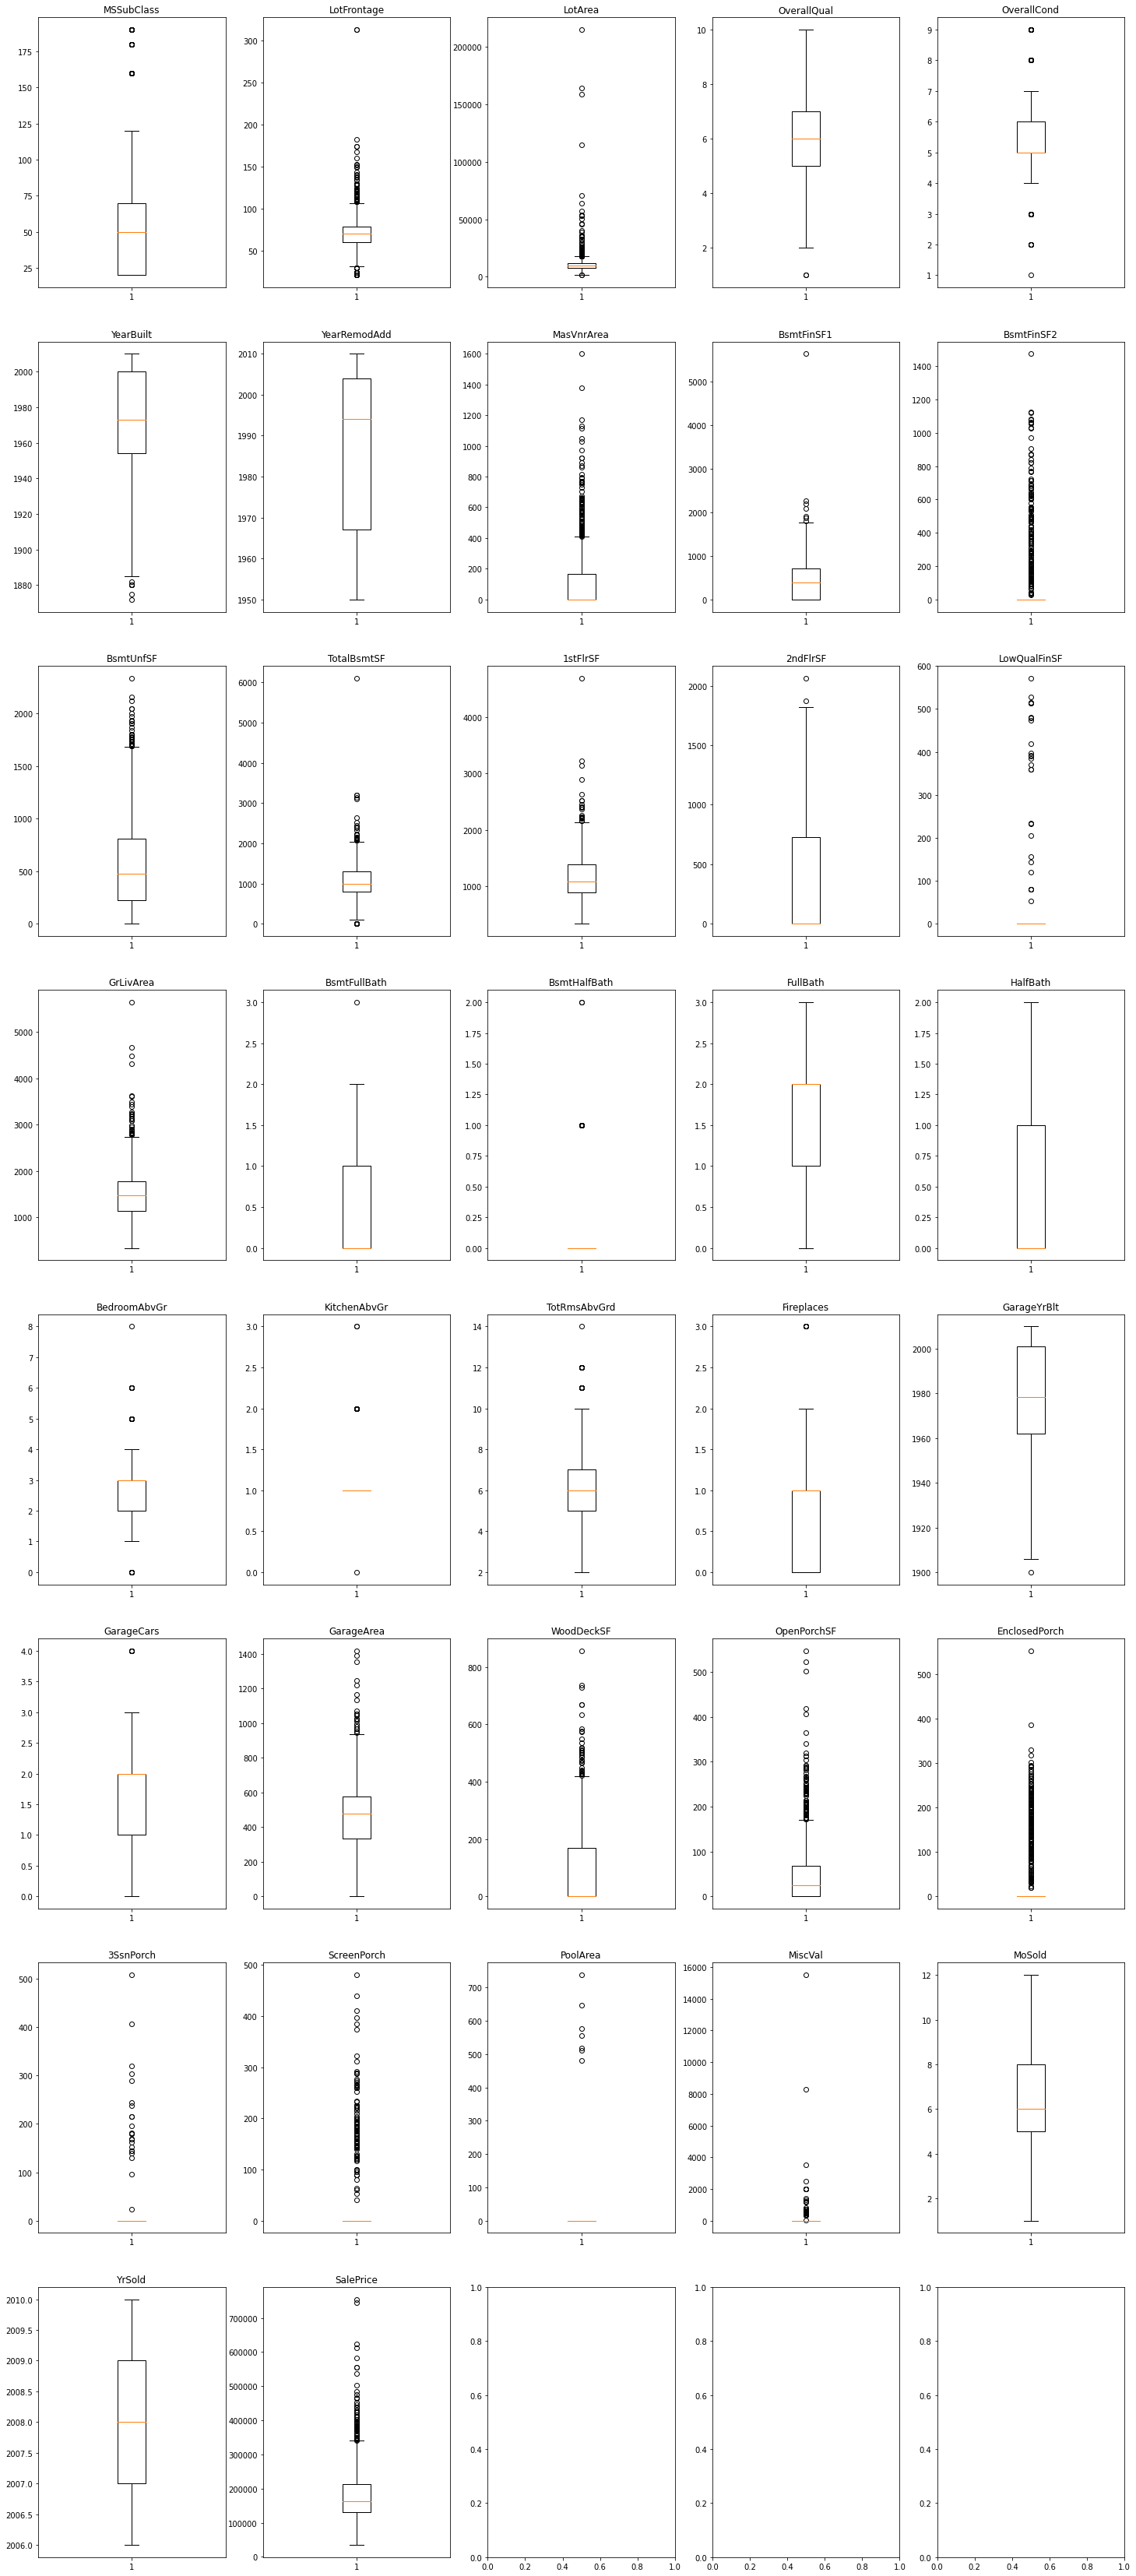

In [145]:
import math
import matplotlib.pyplot as plt

sp_cols = 5
sp_rows = math.ceil(len(numerical_vars)/sp_cols)
sp_row_no = -1
fig = plt.figure(figsize=(25, 60))
ax = fig.subplots(nrows=sp_rows, ncols=sp_cols)
for idx, col in enumerate(numerical_vars):
    if idx%sp_cols == 0:
        sp_row_no += 1
    ax[sp_row_no][idx%sp_cols].boxplot(train_data[col])
    ax[sp_row_no][idx%sp_cols].set_title(col)

plt.show()

#대부분의 데이터에서 이상치가 발견되는데.. 삭제하는 것이 맞는지는 추후 판단

## 데이터 표준화 및 차원 축소

In [146]:
#범주형 변수를 더미 변수로 변환
train_data_t = pd.get_dummies(train_data)
ind_vars = train_data_t.columns.to_list()
ind_vars.remove(dep_var)
len(ind_vars)

288

In [149]:
#데이터 표준화
from sklearn.preprocessing import StandardScaler
x = train_data_t[ind_vars].values # 독립변인들의 value값만 추출
y = train_data_t[dep_var].values # 종속변인 추출

x = StandardScaler().fit_transform(train_data_t[ind_vars]) # x객체에 x를 표준화한 데이터를 저장
pd.DataFrame(x, columns=ind_vars)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,0.575425,-0.288653,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574410,1.171992,-0.288653,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
2,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,0.092907,-0.288653,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
3,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574410,-0.499274,-0.288653,...,-0.058621,-0.301962,-0.045376,0.390293,3.668167,-0.052414,-0.091035,-0.117851,-2.138345,-0.305995
4,0.073375,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,1.364570,0.463568,-0.288653,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073375,-0.365633,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.574410,-0.973018,-0.288653,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1456,-0.872563,0.679039,0.266407,-0.071836,0.381743,0.222975,0.151865,0.084843,0.759659,0.722112,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1457,0.309859,-0.183951,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.574410,-0.369871,-0.288653,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1458,-0.872563,-0.093110,-0.080160,-0.795151,0.381743,-0.704406,0.539493,-0.574410,-0.865548,6.092188,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995


In [157]:
#주성분 분석
from sklearn.decomposition import PCA

n_components = 50
comp_name_list = []
for idx in range(n_components):
    comp_name_list.append("PC{}".format(idx+1))
pca = PCA(n_components=n_components) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=printcipalComponents, columns = comp_name_list)
principalDf[dep_var] = y
# 주성분으로 이루어진 데이터 프레임 구성
principalDf.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,SalePrice
0,4.273563,1.574090,-2.347417,1.889929,0.879254,-1.210231,0.882837,-1.519801,0.239791,-0.248863,...,0.049705,0.253875,-0.866294,-0.435221,0.331643,0.422446,0.096554,0.335231,-0.349848,208500
1,-0.092306,-3.219482,-0.682538,0.082046,0.161093,-0.517974,-0.933926,-0.738035,0.057324,2.238346,...,1.831302,1.251005,0.602171,3.285208,-1.905998,-2.453142,-0.645445,0.780738,-1.272243,181500
2,4.890433,0.910863,-1.686825,2.220665,1.379262,-1.942127,0.721611,-1.696415,0.445580,0.129305,...,1.341840,-0.169071,0.148744,-0.636268,-0.003517,1.184179,0.797359,0.371019,0.525534,223500
3,-1.867797,1.065793,1.807986,1.792120,-1.002289,-0.741247,-1.602697,0.656310,-1.124109,-0.725945,...,-1.925653,-0.924658,0.290767,0.435493,0.280068,-0.094949,3.092985,-0.030629,-0.549138,140000
4,6.526959,0.556580,0.219428,3.714321,1.183334,-0.978266,1.465750,-2.448237,0.782626,-0.107269,...,1.489505,0.167626,0.836665,0.925030,-0.034992,0.107828,0.559703,-0.791574,-0.132051,250000


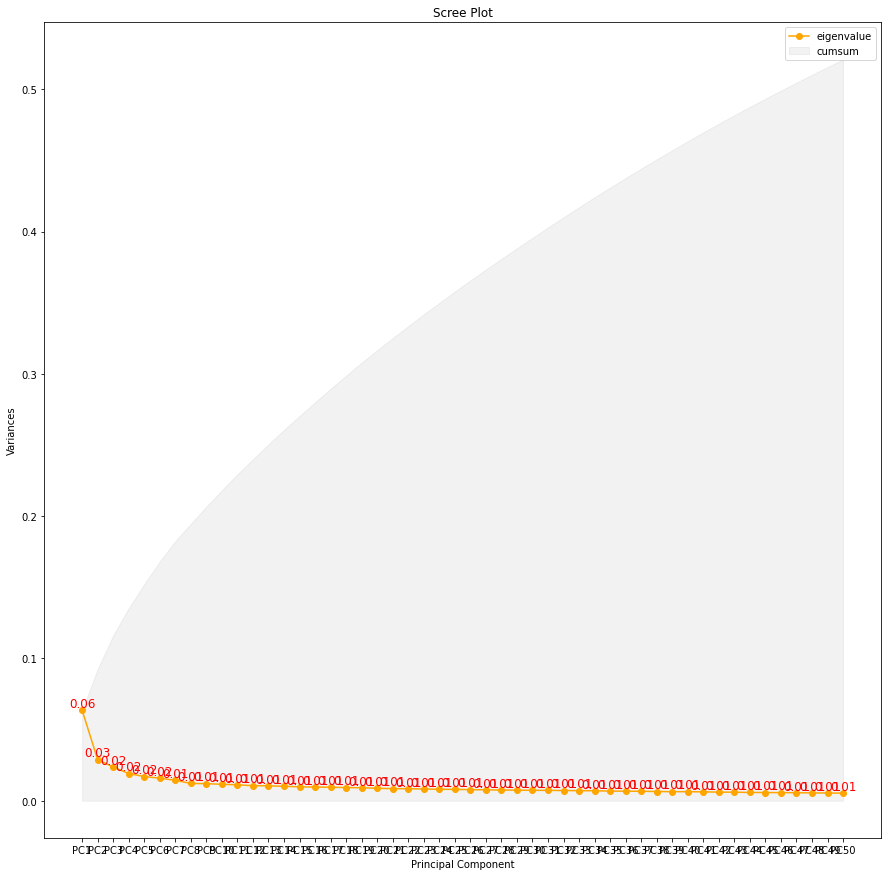

In [158]:
import matplotlib.pyplot as plt

eigenvalue_list = pca.explained_variance_ratio_
eigenvalue_dic = []
for idx, eigenvalue in enumerate(eigenvalue_list):
    eigenvalue_dic.append({"comp" : "PC{}".format(idx+1), "eigenvalue" : eigenvalue})
eigenvalue_df = pd.DataFrame(eigenvalue_dic)
#누적합 계산하여 PC들의 분산합이 얼마나 되는지도 보여줄 것
eigenvalue_df["cumsum"] = eigenvalue_df["eigenvalue"].cumsum()

plt.figure(figsize=(15, 15))
plt.plot(eigenvalue_df["comp"], eigenvalue_df["eigenvalue"], label="eigenvalue", 
         color="orange", marker="o")
for item in eigenvalue_df["eigenvalue"].items():
    plt.text(item[0], item[1], "{:4.2f}".format(item[1]),
             fontsize = 12, color="red", horizontalalignment="center", verticalalignment="bottom") 
plt.fill_between(eigenvalue_df["comp"], [0 for x in range(n_components)], eigenvalue_df["cumsum"],
                 color="k", alpha=0.05, label="cumsum")
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Variances")
plt.legend()
plt.show()

## 여러 모델로 돌려보기

In [137]:
#변수 갯수가 너무 많은데...

import statsmodels.formula.api as sm

ind_vars_form = "+".join(ind_vars[0:10])
model = sm.ols(dep_var+" ~ "+ind_vars_form, train_data_t)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     382.2
Date:                Mon, 13 Sep 2021   Prob (F-statistic):               0.00
Time:                        11:27:47   Log-Likelihood:                -17601.
No. Observations:                1460   AIC:                         3.522e+04
Df Residuals:                    1449   BIC:                         3.528e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.107e+06    1.3e+05     -8.545      0.000   -1.36e+06   -8.53e+05
MSSubClass    -111.7491     28.108     -3.976      0.000    -166.886     -56.612
LotFrontage    241.7214     57.734      4.187      0.000     128.471     354.972
LotArea          0.9685      0.118      8.212      0.000       0.737       1.200
OverallQual   3.405e+04   1097.350     31.031      0.000    3.19e+04    3.62e+04
OverallCond    227.4506   1166.913      0.195      0.845   -2061.569    2516.470
YearBuilt       74.9205     57.324      1.307      0.191     -37.527     187.368
YearRemodAdd   449.3468     75.530      5.949      0.000     301.186     597.507
MasVnrArea      63.4484      6.863      9.245      0.000      49.986      76.911
BsmtFinSF1      24.5948      2.616      9.402      0.000      19.463      29.726
BsmtFinSF2      14.7819      6.890      2.145      0.032       1.267      28.297
==============================================================================
Omnibus:                      469.649   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23600.245
Skew:                           0.704   Prob(JB):                         0.00
Kurtosis:                      22.646   Cond. No.                     1.73e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""